# TITANIC SURVIVAL PREDICTION

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("Titanic.csv")

# DATA PREPARING

In [4]:
# Fill missing 'Embarked' values with the most common port
most_common_port = df['Embarked'].mode()[0]
df['Embarked'].fillna(most_common_port, inplace=True)


In [5]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [6]:
# Droped the unnecessary and maximum null balue contained columns
df.drop(["PassengerId", "Name", "Cabin", "Ticket"], axis =1, inplace =True)

In [7]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [8]:
mean_age = df["Age"].mean()
df["Age"].fillna(mean_age, inplace=True)

In [9]:
mean_fare = df["Fare"].mean()
df["Fare"].fillna(mean_fare, inplace=True)

In [10]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [11]:
# Convert categorical variables to numerical

# Sex variable conversion
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Point of intering in the sheep
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
# 'C' (Cherbourg) -->0
# 'Q' (Queenstown) -->1
# 'S' (Southampton) -->2 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    int64  
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Embarked  418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,1
1,1,3,1,47.0,1,0,7.0000,2
2,0,2,0,62.0,0,0,9.6875,1
3,0,3,0,27.0,0,0,8.6625,2
4,1,3,1,22.0,1,1,12.2875,2


<Axes: ylabel='Density'>

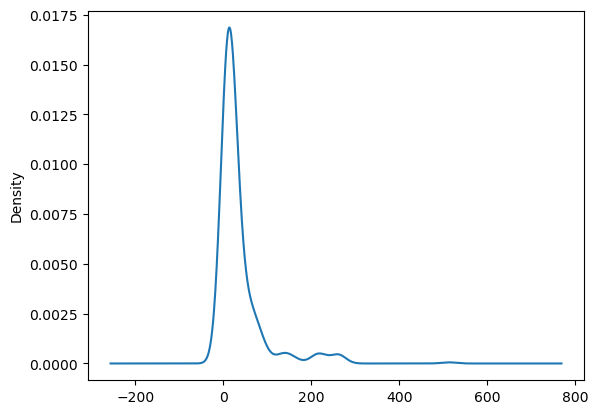

In [14]:
df['Fare'].plot(kind='kde')

In [15]:
df.shape

(418, 8)

# TRAIN DATA

In [16]:
# Split the data 
X = df.drop('Survived', axis=1)
y = df['Survived']


In [17]:
# This random_state is used to fix the values, if we not select this the machine will provide the the radom sample to you 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
len(X)

418

In [19]:
len(y)

418

In [20]:
len(X_test)

84

In [21]:
len(y_test)

84

In [22]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
321,3,0,25.0,0,0,7.2292,0
324,1,1,39.0,0,0,211.3375,2
388,3,0,21.0,0,0,7.7500,1
56,3,0,35.0,0,0,7.8958,2
153,3,1,36.0,0,2,12.1833,2
...,...,...,...,...,...,...,...
57,3,0,25.0,0,0,7.6500,2
126,3,0,22.0,0,0,7.7958,2
24,1,1,48.0,1,3,262.3750,0
17,3,0,21.0,0,0,7.2250,0


In [23]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
336,2,0,32.00000,0,0,13.0000,2
31,2,0,24.00000,2,0,31.5000,2
84,2,0,30.27259,0,0,10.7083,1
287,1,0,24.00000,1,0,82.2667,2
317,2,0,19.00000,0,0,10.5000,2
...,...,...,...,...,...,...,...
71,3,0,21.00000,0,0,7.8958,2
106,3,0,21.00000,0,0,7.8208,1
270,1,0,46.00000,0,0,75.2417,0
348,2,0,24.00000,0,0,13.5000,2


In [24]:
y_test

321    0
324    1
388    0
56     0
153    1
      ..
57     0
126    0
24     1
17     0
66     1
Name: Survived, Length: 84, dtype: int64

In [25]:
y_train

336    0
31     0
84     0
287    0
317    0
      ..
71     0
106    0
270    0
348    0
102    0
Name: Survived, Length: 334, dtype: int64

# LINEAR REGRESION

In [26]:
# We used the linear regression model
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [27]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
321,3,0,25.0,0,0,7.2292,0
324,1,1,39.0,0,0,211.3375,2
388,3,0,21.0,0,0,7.7500,1
56,3,0,35.0,0,0,7.8958,2
153,3,1,36.0,0,2,12.1833,2
...,...,...,...,...,...,...,...
57,3,0,25.0,0,0,7.6500,2
126,3,0,22.0,0,0,7.7958,2
24,1,1,48.0,1,3,262.3750,0
17,3,0,21.0,0,0,7.2250,0


In [28]:
prediction = clf.predict(X_test)

In [29]:
prediction

array([-4.87543227e-15,  1.00000000e+00, -4.80978027e-15, -5.07183408e-15,
        1.00000000e+00,  1.22871550e-15,  1.00000000e+00,  6.51435356e-15,
        1.00000000e+00, -4.98556304e-15, -3.51982619e-15,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00, -4.98556304e-15, -4.80783033e-15,
        1.00000000e+00,  6.49362547e-15, -2.84832138e-15,  1.66134588e-15,
        4.34834387e-16,  7.37355267e-15,  1.00000000e+00,  9.24329485e-16,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  6.85588894e-15,
       -6.71626708e-15,  9.24329485e-16, -4.96377571e-15,  1.00000000e+00,
        1.00000000e+00, -4.98556304e-15,  1.00000000e+00,  1.00580500e-15,
        1.00000000e+00,  9.44445859e-16,  1.00000000e+00,  7.51158465e-15,
        1.00000000e+00,  1.00000000e+00,  7.49963843e-16,  6.90376536e-15,
        6.90987320e-15, -4.81817443e-15,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00, -5.09233277e-15, -5.05423725e-15,  1.00000000e+00,
        1.00000000e+00,  

In [30]:
clf.score(X_test, y_test)

1.0

# MODEL TRAINING 

In [31]:
# Model Training
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [32]:
from sklearn.metrics import r2_score

# Model Evaluation
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)


R^2 Score: 1.0


In [33]:
from sklearn.metrics import accuracy_score

# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [34]:
from sklearn.metrics import accuracy_score, classification_report


# Model Evaluation

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



NOTE:
1) Precision : Presition is the ratio of correctly predicted positive observations to the total predicted positive observations
2) Recall : Recall is the ratio of correctcly predicted positive observations to the all observations in actual class
3) F1-score : Is the waited average of precision and recall